In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


# **Import Necessary Modules**

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Dataset

In [18]:
test = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')
train = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

# Drop un-necessary columns

In [19]:
X = test.drop(columns=['label'])
y = test['label']

## Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalizing the Data in range of 0-1

In [21]:
X_train/=255
X_test/=255

# Building ANN (Artificial Neural Network)

In [22]:
model = Sequential()

# model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(156, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Compiling the Model

In [23]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

## Training the Model

In [24]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=30)

Epoch 1/30
214/214 [==============================] - 2s 7ms/step - loss: 0.6346 - accuracy: 0.8198 - val_loss: 0.3173 - val_accuracy: 0.9100
Epoch 2/30
214/214 [==============================] - 1s 6ms/step - loss: 0.2409 - accuracy: 0.9342 - val_loss: 0.2291 - val_accuracy: 0.9300
Epoch 3/30
214/214 [==============================] - 1s 6ms/step - loss: 0.1692 - accuracy: 0.9469 - val_loss: 0.2171 - val_accuracy: 0.9369
Epoch 4/30
214/214 [==============================] - 1s 6ms/step - loss: 0.1135 - accuracy: 0.9659 - val_loss: 0.1823 - val_accuracy: 0.9469
Epoch 5/30
214/214 [==============================] - 1s 6ms/step - loss: 0.0816 - accuracy: 0.9775 - val_loss: 0.1792 - val_accuracy: 0.9488
Epoch 6/30
214/214 [==============================] - 1s 6ms/step - loss: 0.0557 - accuracy: 0.9839 - val_loss: 0.1786 - val_accuracy: 0.9475
Epoch 7/30
214/214 [==============================] - 1s 6ms/step - loss: 0.0406 - accuracy: 0.9894 - val_loss: 0.1689 - val_accuracy: 0.9519
Epoch 

## Testing the Model

In [25]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

63/63 [==============================] - 0s 2ms/step


In [26]:
accuracy_score(y_test, y_pred)

0.957

## Plot is representing that approximately after 0.1** loss again tends to increase 
and the difference between both plots representing that model is overfitting

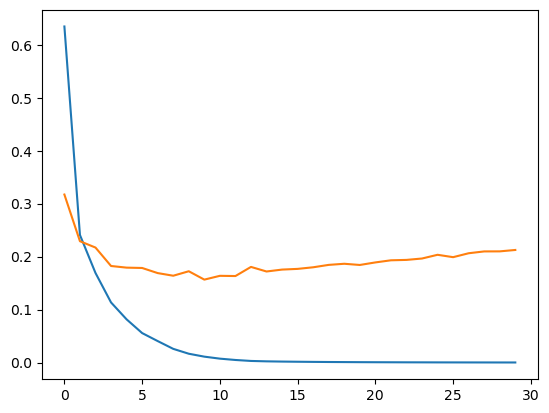

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

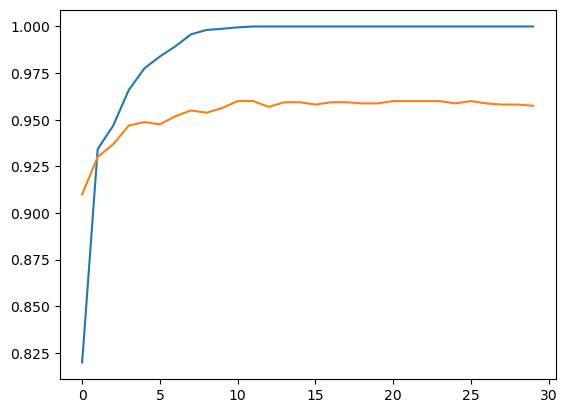

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

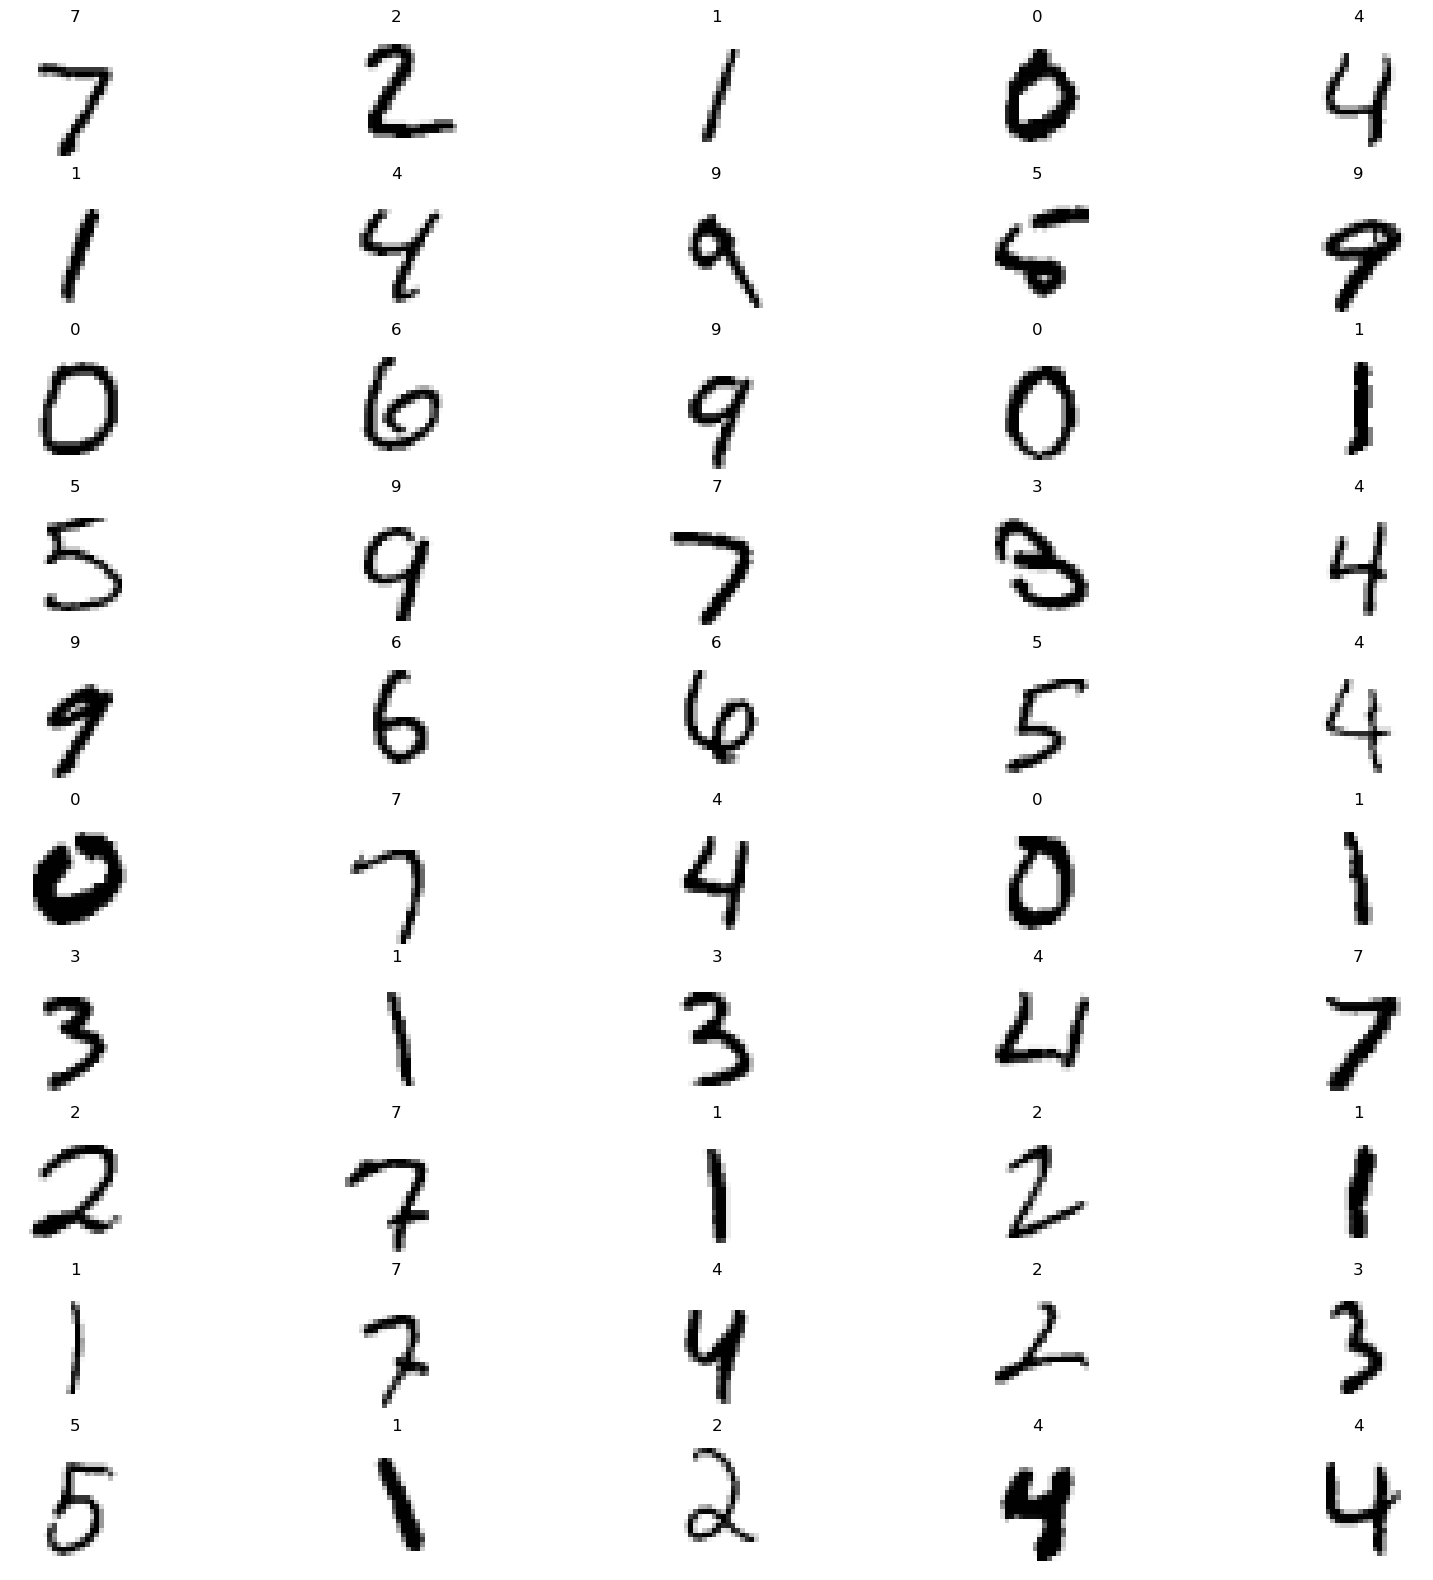

In [29]:
images = np.array(X).reshape(len(test.index),28,28)
plt.figure(figsize=(20,20))
for i in range(0,50) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray_r")
    plt.title(y[i])